In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier


In [3]:
file_path = 'data_evaluacion.csv'
data = pd.read_csv(file_path)
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   39             48841 non-null  int64 
 1   State-gov      48841 non-null  object
 2   77516          48841 non-null  int64 
 3   Bachelors      48841 non-null  object
 4   13             48841 non-null  int64 
 5   Never-married  48841 non-null  object
 6   Adm-clerical   48841 non-null  object
 7   Not-in-family  48841 non-null  object
 8   White          48841 non-null  object
 9   Male           48841 non-null  object
 10  2174           48841 non-null  int64 
 11  0              48841 non-null  int64 
 12  40             48841 non-null  int64 
 13  United-States  48841 non-null  object
 14  <=50K          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   39             48841 non-null  int64 
 1   State-gov      48841 non-null  object
 2   77516          48841 non-null  int64 
 3   Bachelors      48841 non-null  object
 4   13             48841 non-null  int64 
 5   Never-married  48841 non-null  object
 6   Adm-clerical   48841 non-null  object
 7   Not-in-family  48841 non-null  object
 8   White          48841 non-null  object
 9   Male           48841 non-null  object
 10  2174           48841 non-null  int64 
 11  0              48841 non-null  int64 
 12  40             48841 non-null  int64 
 13  United-States  48841 non-null  object
 14  <=50K          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
data = pd.read_csv(file_path, header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

In [9]:
unique_counts = data.nunique()
columns_with_few_uniques = unique_counts[unique_counts < 10]

print(columns_with_few_uniques)

workclass         9
marital-status    7
relationship      6
race              5
sex               2
income            2
dtype: int64


In [11]:
# Definir mapeos para las variables categóricas
workclass_map = {'Private': 0, 'Self-emp-not-inc': 1, 'Self-emp-inc': 2, 'Federal-gov': 3, 'Local-gov': 4, 'State-gov': 5, 'Without-pay': 6, 'Never-worked': 7,'?':8}
education_map = {'Bachelors': 0, 'Some-college': 1, '11th': 2, 'HS-grad': 3, 'Prof-school': 4, 'Assoc-acdm': 5, 'Assoc-voc': 6, '9th': 7, '7th-8th': 8, '12th': 9, 'Masters': 10, '1st-4th': 11, '10th': 12, 'Doctorate': 13, '5th-6th': 14, 'Preschool': 15}
marital_status_map = {'Married-civ-spouse': 0, 'Divorced': 1, 'Never-married': 2, 'Separated': 3, 'Widowed': 4, 'Married-spouse-absent': 5, 'Married-AF-spouse': 6}
occupation_map = {'Tech-support': 0, 'Craft-repair': 1, 'Other-service': 2, 'Sales': 3, 'Exec-managerial': 4, 'Prof-specialty': 5, 'Handlers-cleaners': 6, 'Machine-op-inspct': 7, 'Adm-clerical': 8, 'Farming-fishing': 9, 'Transport-moving': 10, 'Priv-house-serv': 11, 'Protective-serv': 12, 'Armed-Forces': 13,'?':14}
relationship_map = {'Wife': 0, 'Own-child': 1, 'Husband': 2, 'Not-in-family': 3, 'Other-relative': 4, 'Unmarried': 5}
race_map = {'White': 0, 'Asian-Pac-Islander': 1, 'Amer-Indian-Eskimo': 2, 'Other': 3, 'Black': 4}
sex_map = {'Female': 0, 'Male': 1}
native_country_map = {'United-States': 0, 'Cambodia': 1, 'England': 2, 'Puerto-Rico': 3, 'Canada': 4, 'Germany': 5, 'Outlying-US(Guam-USVI-etc)': 6, 'India': 7, 'Japan': 8, 'Greece': 9, 'South': 10, 'China': 11, 'Cuba': 12, 'Iran': 13, 'Honduras': 14, 'Philippines': 15, 'Italy': 16, 'Poland': 17, 'Jamaica': 18, 'Vietnam': 19, 'Mexico': 20, 'Portugal': 21, 'Ireland': 22, 'France': 23, 'Dominican-Republic': 24, 'Laos': 25, 'Ecuador': 26, 'Taiwan': 27, 'Haiti': 28, 'Columbia': 29, 'Hungary': 30, 'Guatemala': 31, 'Nicaragua': 32, 'Scotland': 33, 'Thailand': 34, 'Yugoslavia': 35, 'El-Salvador': 36, 'Trinadad&Tobago': 37, 'Peru': 38, 'Hong': 39, 'Holand-Netherlands': 40,'?':41}

In [13]:
# Aplicar mapeos
data['workclass'] = data['workclass'].map(workclass_map)
data['education'] = data['education'].map(education_map)
data['marital-status'] = data['marital-status'].map(marital_status_map)
data['occupation'] = data['occupation'].map(occupation_map)
data['relationship'] = data['relationship'].map(relationship_map)
data['race'] = data['race'].map(race_map)
data['sex'] = data['sex'].map(sex_map)
data['native-country'] = data['native-country'].map(native_country_map)

In [15]:
# Convertir la variable objetivo
data['income'] = (data['income'] == '>50K').astype(int)

In [17]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,0,13,2,8,3,0,1,2174,0,40,0,0
1,50,1,83311,0,13,0,4,2,0,1,0,0,13,0,0
2,38,0,215646,3,9,1,6,3,0,1,0,0,40,0,0
3,53,0,234721,2,7,0,6,2,4,1,0,0,40,0,0
4,28,0,338409,0,13,0,5,0,4,0,0,0,40,12,0


In [19]:
# Separar características y etiquetas
X = data.drop('income', axis=1)
y = data['income']

In [21]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [25]:
# Crear y entrenar el modelo de árbol de decisión con criterio Gini
arbol = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [27]:
# Realizar predicciones en el conjunto de prueba
y_pred = arbol.predict(X_test)

In [29]:
# Evaluar el modelo
print('Train Accuracy : %.5f' % arbol.score(X_train, y_train))
print('Test Accuracy : %.5f' % arbol.score(X_test, y_test))
print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

Train Accuracy : 0.84281
Test Accuracy : 0.84454
Precisión del modelo: 0.8445369548897836
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11147
           1       0.74      0.54      0.63      3506

    accuracy                           0.84     14653
   macro avg       0.80      0.74      0.76     14653
weighted avg       0.84      0.84      0.84     14653

Matriz de confusión:
 [[10465   682]
 [ 1596  1910]]


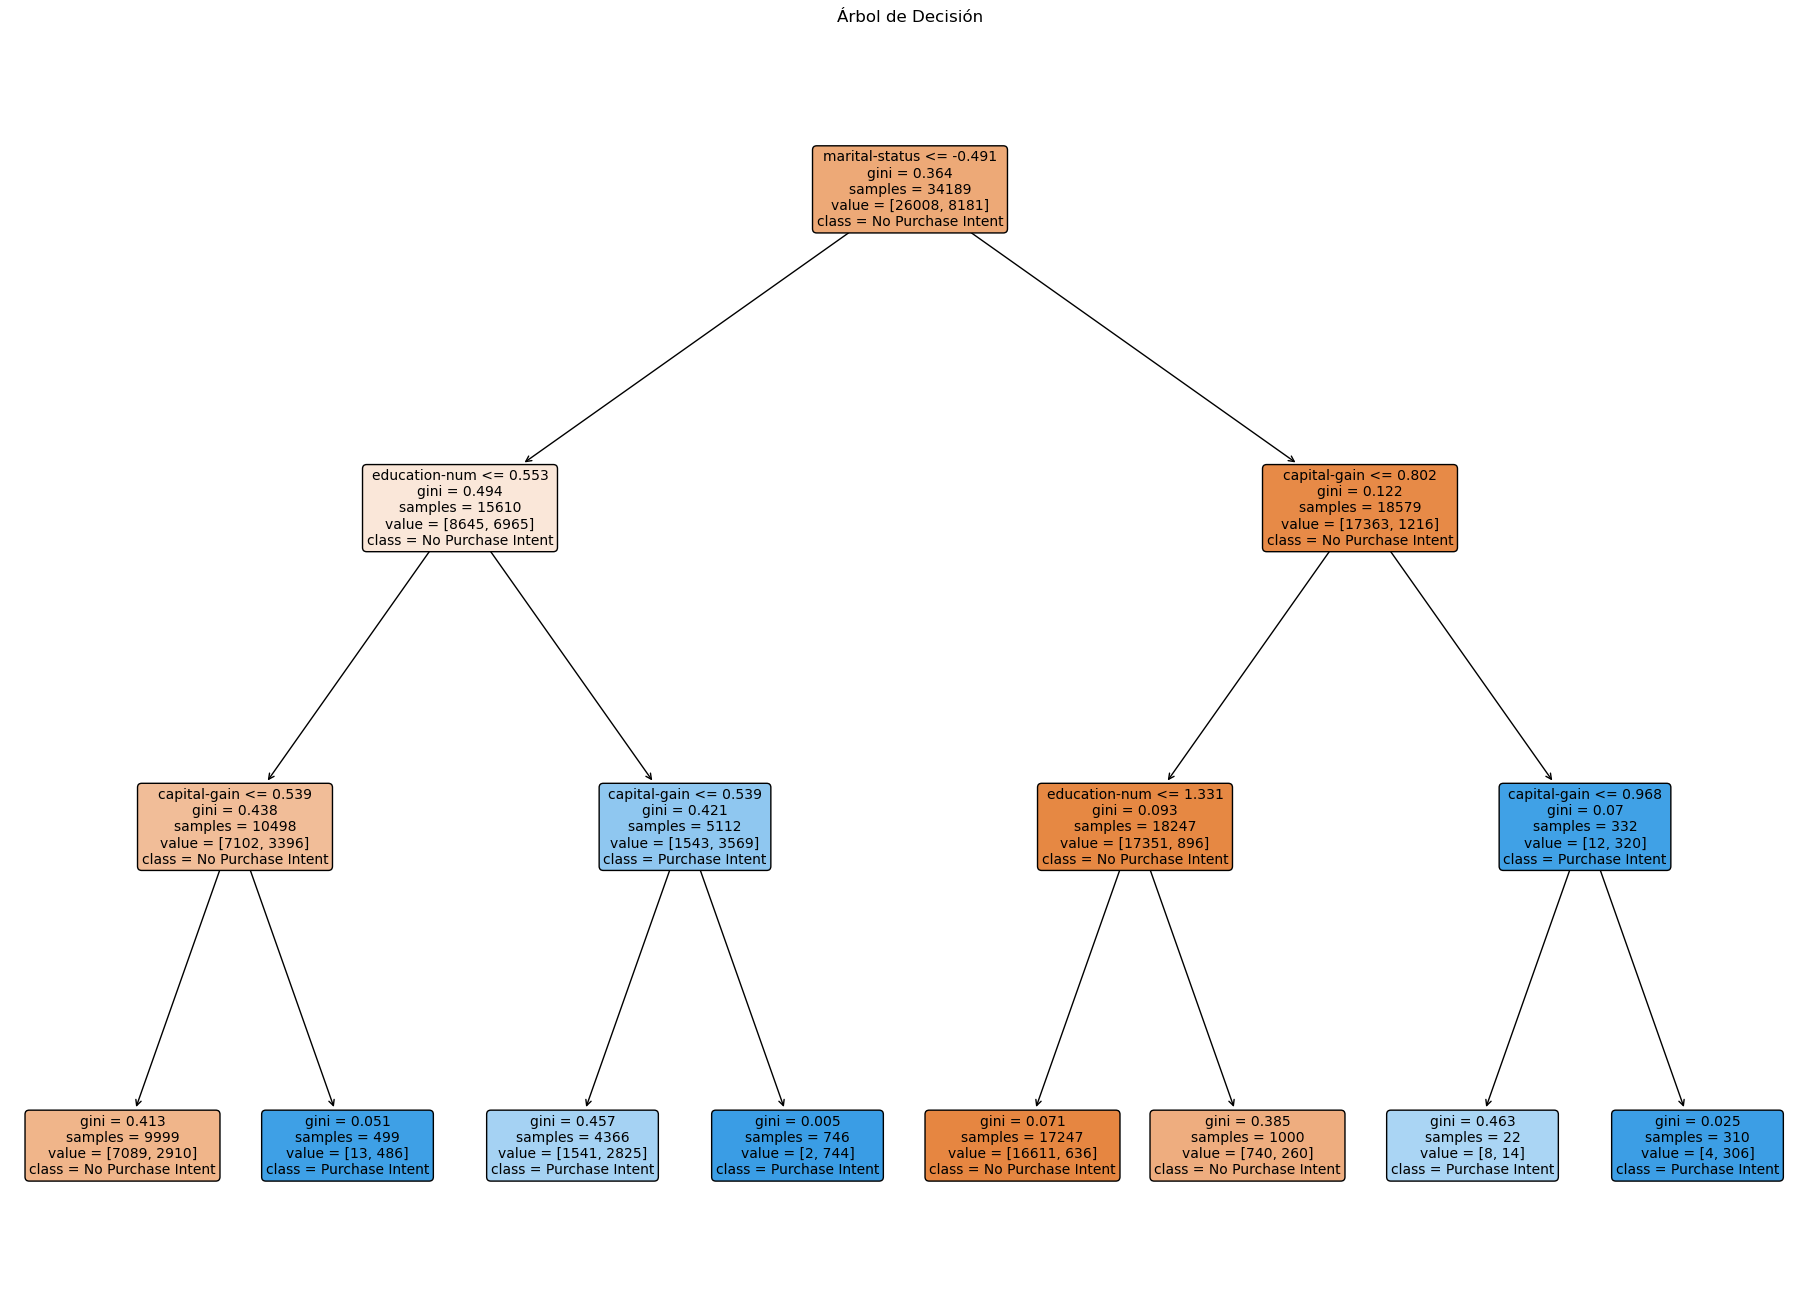

In [33]:
feature_names = X.columns.tolist()

# Definir los nombres de las clases
class_names = ['No Purchase Intent', 'Purchase Intent']

# Visualizar el árbol de decisión con mayor separación
plt.figure(figsize=(20, 15))  # Aumentar el tamaño de la figura
plot_tree(arbol, 
          filled=True,
          feature_names=feature_names,
          class_names=class_names,
          rounded=True,
          fontsize=10)
plt.title("Árbol de Decisión")
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.05)  # Ajustar márgenes
plt.show()